<div style="direction:rtl; line-height: 2.5; font-family: 'XB Zar', sans-serif; border: 5px solid #008B8B; border-radius: 15px; margin: 20px;"> 

<div style="font-family: arial; direction: rtl; padding: 15px 0;">

<h4 style="text-align: center;">به نام خدا</h4>

<h2 style="text-align: center; color: #103bc9;">مقدمه‌ای بر داده‌کاوی</h2>

<h3 style="text-align: center; color: #d42c06;">دانشگاه علم و صنعت ایران</h3>
    
<h3 style="text-align: center; color: #d42c06;">دانشکده ریاضی و علوم کامپیوتر</h3>

<h4 style="padding-top: 7px; text-align: center;">نیمسال اول سال تحصیلی ۱۴۰۳-۱۴۰۴</h4>

<hr style="margin-top: 25px; border-color: #fff;">

<h1 style="text-align: center; color: #9c0000; margin-bottom: 30px;">تمرین ۷.۱: SVM </h1>

<h3 style="text-align: center; margin-top: 20px;">دکتر مائده السادات طاهائی</h3>

<div align="center" style="font-size: 20px; margin-top: 20px; line-height: 2;">گردآورندگان: هربد پورعلی، کاظم فرقانی</div>

</div>

</div>

<div style="font-family: arial">
<h2 id="introduction" style="color: #d42c06;"> 1. Support Vector Machine</h2>
</div>

<div style="direction: rtl; font-size: 1.1em; font-family: arial;">
در بخش اول، ما یک مدل ساده از SVM را پیاده‌سازی می‌کنیم. در ادامه، مدل‌های پیچیده‌تری را با استفاده از ماژول‌های  کتابخانه Scikit-Learn  پیاده‌سازی خواهیم کرد.

</div>

<div style="font-family: arial">
<h2 id="introduction" style="color: #d42c06;"> 1.1 Hard Margin SVM</h2>
</div>

<div style="direction: rtl; font-size: 1.1em; font-family: arial; ">
این مدل یک دسته‌بند با حاشیه سخت (Hard Margin Classifier) یا دسته‌بند با حاشیه بیشینه (Maximal Margin Classifier) تلقی می‌شود.
در این رویکرد، به دنبال بهترین مرز جداکننده هستیم، اما این بهترین مرز چیست و چگونه پیدا می‌شود؟ اگر فاصله نزدیک‌ترین نقطه به مرز را به‌عنوان حاشیه تعریف کنیم، بهترین خطی که دو کلاس را جدا می‌کند، خطی است که این فاصله را بیشینه کند.
برای پیدا کردن این مرز، مدل خود را به دو روش پیاده‌سازی می‌کنیم: ابتدا از پایه و سپس با استفاده از کتابخانه Scikit-Learn. در هر دو بخش از یک مجموعه داده یکسان استفاده می‌کنیم.
</div>

<div style="direction: rtl; font-size: 1.1em; font-family: arial;">
برای ساده‌سازی و نمایش، یک مجموعه داده مصنوعی که به صورت خطی قابل تفکیک است، با ۲ ویژگی و ۳۰۰ نمونه تولید می‌کنیم.  
برای این کار از تابع <code>make_blobs</code> از ماژول <code>scikit-learn.datasets</code> استفاده می‌کنیم.
</div>



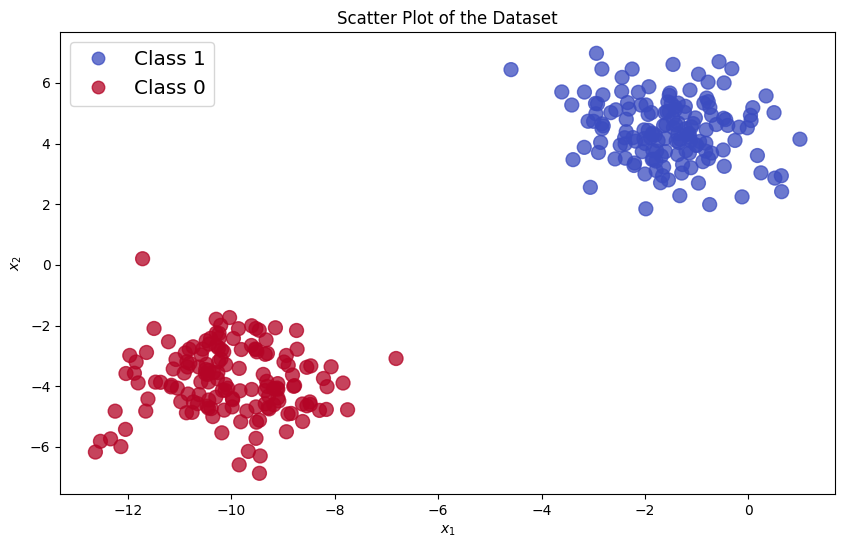

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt

X, y = datasets.make_blobs(n_samples=300, n_features=2, centers=2, cluster_std=1.05, random_state=1)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], marker='o', cmap='coolwarm', c=y, s=100, alpha=0.75)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Scatter Plot of the Dataset")
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plt.show();

<div style="direction: rtl; font-size: 1.1em; font-family: arial;">
با توجه به نمودار بالا مجموعه داده ما به طور کامل به صورت خطی قابل تفکیک است، بنابراین انتظار می‌رود دقت الگوریتم‌های ما بر روی این داده‌ها ۱۰۰٪ باشد.
</div>

<div style="font-family: arial; direction: rtl;">
    
<h2 id="introduction" style="color: #d42c06;">نمودار چند نمونه مرز </h2>

</div>

<div style="direction: rtl; font-size: 1.1em; font-family: arial;">
 چند نمونه از مرزها را همراه با حاشیه‌هایشان رسم می‌کنیم.
<hr style="margin-top: 25px; border-color: #fff;">


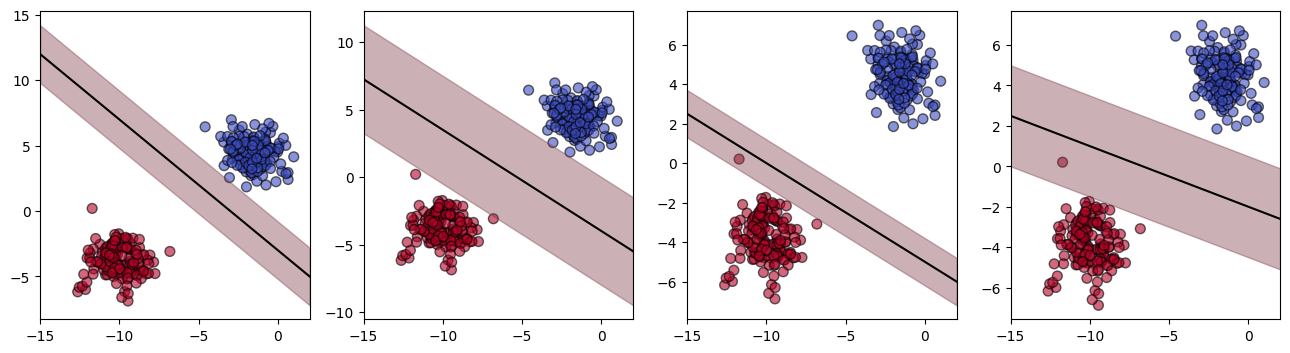

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 4))

x_values = np.linspace(-15, 2)

for i, (w, b, m) in enumerate([(-1, -3, 2.2), (-0.75, -4, 4), (-0.5, -5, 1.2), (-0.3, -2, 2.5)]):
    plt.subplot(1, 4, i + 1)

    # draw data
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
    y_values = w * x_values + b

    # draw separator and margin
    plt.plot(x_values, y_values, '-k')
    plt.fill_between(x_values, y_values - m, y_values + m, edgecolor='none', color='#7D3C4A', alpha=0.4)
    plt.xlim(-15, 2)

plt.show()

<div style="padding: 30px; padding-top: 0; padding-bottom: 0;">

<hr style="border-color: #fff;">

</div>

<div style="font-family: arial; direction: rtl;">
    
<h2 id="introduction" style="color: #d42c06;">استفاده از کتابخانه Scikit-Learn </h2>

</div>

<div style="direction: rtl; font-size: 1.1em; font-family: arial;">
مانند سایر دسته‌بندها، SVC با دو آرایه مدل‌سازی می‌شود:

* آرایه X که نمونه‌های آموزشی را نگه می‌دارد و اندازه آن به صورت [n_samples, n_features] است.
* آرایه y که مقادیر هدف را ذخیره می‌کند. کلاس برچسب برای نمونه‌های آزمایشی است و اندازه آن به صورت [n_samples] است.

<span>
بسیاری از الگوریتم‌های یادگیری ماشین هایپرپارامترهایی دارند که باید قبل از آموزش مدل مشخص شوند؛ به عنوان مثال، در این طبقه‌بندی، باید هایپرپارامتر <code>kernel</code> را مشخص کنیم. این هایپرپارامتر به طور کامل‌تر در ادامه توضیح داده خواهد شد؛ اما اکنون به این نکته توجه کنید که با تنظیم آن بر روی مقدار خطی <code>linear</code>، در واقع دسته‌بند حاشیه بیشینه مورد نظر را آموزش می‌دهیم.
</span>
</div>


In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# create Support Vector Classifier using a linear kernel
clf = SVC(kernel='linear')

# train the classifier
clf.fit(X, y)

SVC(kernel='linear')

<div style="direction: rtl; font-size: 1.1em; font-family: arial;">
حال می‌توانیم وزن هر ویژگی از داده‌های ورودی را با کمک مشخصه <code>coef_</code> و مقدار بایاس ابرصفحه جداکننده را با کمک مشخصه <code>intercept_</code> به دست آوریم.
</div>


In [6]:
print("w =", clf.coef_)
print("b =", clf.intercept_)

w = [[-0.16435207 -0.24500639]]
b = [-0.87615033]


<div style="direction: rtl; font-size: 1.1em; font-family: arial;">
مقادیر بالا نشان می‌دهند که معادله ابرصفحه جداکننده به صورت زیر است:
</div>

$$f(X) = w_1x_1 + w_2x_2 + b = -0.1634x_1 - 0.2455x_2 - 0.8717 = 0$$



<div style="direction: rtl; font-size: 1.1em; font-family: arial;">
در این مدل، بردارهای پشتیبانی در مشخصه <code>support_vectors_</code> ذخیره می‌شوند و می‌توانیم مشاهده کنیم که کدام نمونه‌ها به تعیین ابرصفحه بهینه کمک کرده‌اند.
</div>


In [7]:
clf.support_vectors_

array([[ -3.05810916,   2.55776688],
       [-11.71703458,   0.20318429],
       [ -6.81531254,  -3.08753469]])

<div style="direction: rtl; font-size: 1.1em; font-family: arial;">
در نهایت، با کمک تابع <code>plot_svc_decision_boundary</code> که در زیر نوشته شده است، خط بهینه جداکننده دو کلاس به‌دست‌آمده در این مدل را رسم می‌کنیم.
</div>


In [10]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    
    if ax is None:
        ax = plt.gca()

    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    
    Y, X = np.meshgrid(y, x)

    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])[0]

    # plot the margins
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

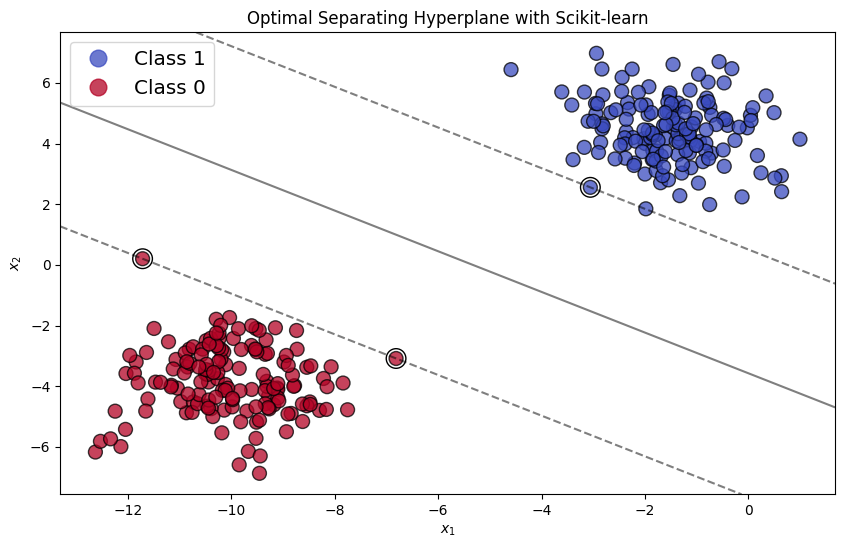

In [12]:
plt.figure(figsize=(10,6))

# plot data and margin
scatter_data = plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolors='black', cmap='coolwarm', alpha=0.75)
plt.legend(handles=scatter_data.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=2)
plot_svc_decision_function(clf)

# plot support vectors
scatter_support = plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, edgecolors='k', facecolors='none')

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Optimal Separating Hyperplane with Scikit-learn")
plt.show()

<div style="font-family: arial">
<h2 id="introduction" style="color: #d42c06;"> 1.2 Soft Margin SVM</h2>
</div>

<div style="font-family: arial">
<h2 id="introduction" style="color: #d42c06;"> 1.2.1 The problem with Hard Margin SVM</h2>
</div>

<div style="direction: rtl; font-size: 1.1em; font-family: arial;">
<span>
همان‌طور که می‌دانید دسته‌بند حاشیه بیشینه تنها زمانی به درستی کار می‌کند که داده‌های دو کلاس به صورت خطی قابل تفکیک باشند. همچنین، مرز این مدل توسط نمونه‌هایی که روی مرز قرار گرفته‌اند تعیین می‌شود؛ در واقع، اگر تنها یکی از نمونه‌های آموزشی نزدیک به مرز کمی تغییر اندازه داشته باشد، مرز تصمیم‌گیری به طور کامل تغییر می‌کند!
</span><br>
<span>
نکته مهم این است که در بیشتر موارد داده‌های ما در دنیای واقعی مقداری نویز دارند و بنابراین مشکل فوق می‌تواند تأثیر نامطلوبی روی مرز تصمیم‌گیری ما داشته باشد. به همین دلیل، این مدل به شدت مستعد بیش‌برازش (Overfitting) است.  
</span><br>
<span>
برای درک بهتر، مدل دسته‌بند حاشیه بیشینه را در شرایط ذکر شده با استفاده از Scikit-learn امتحان می‌کنیم. ابتدا مدل خود را روی مجموعه داده اولیه‌ای که خطی قابل تفکیک است برازش می‌کنیم؛ سپس یک نمونه نویز به هر کلاس اضافه کرده و مدل جدیدی روی آن‌ها برازش می‌کنیم تا تأثیر آن‌ها بر مرز تصمیم‌گیری را مشاهده کنیم.
</span>
</div>

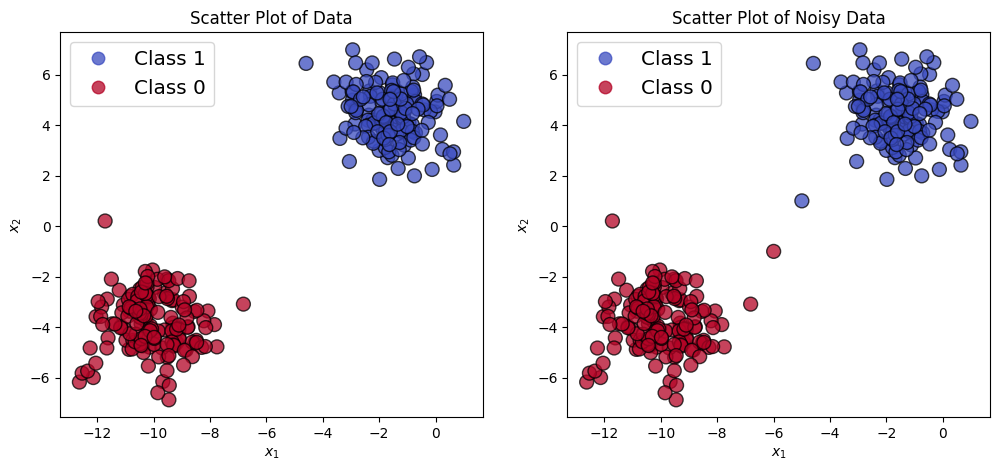

In [13]:
from sklearn import datasets
import matplotlib.pyplot as plt

X, y = datasets.make_blobs(n_samples=300, n_features=2, centers=2, cluster_std=1.05, random_state=1)

# Add noise sample
X_noisy = np.concatenate((X,[[-5,1], [-6,-1]]), axis=0)
y_noisy = np.append(y,[0,1])

# Plot intial data
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='coolwarm', edgecolor='black', alpha=0.75)
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Scatter Plot of Data");

# Plot noisy data
plt.subplot(1,2,2)
scatter = plt.scatter(X_noisy[:, 0], X_noisy[:, 1], c=y_noisy, s=100, cmap='coolwarm', edgecolor='black', alpha=0.75)
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Scatter Plot of Noisy Data");

<div style="direction: rtl; font-size: 1.1em; font-family: arial;">
همان‌طور که می‌دانید، ماشین بردار پشتیبان با حاشیه نرم یک هایپرپارامتر به نام <code>C</code> دارد که باید آن را تعیین کنیم.  
برای این کار، چهار مدل با چهار مقدار متفاوت از <code>C</code> آموزش می‌دهیم تا نتایج آن‌ها را مشاهده کنیم.
</div>


In [14]:
from sklearn.svm import SVC

# Maximal Margin Classifier on initial dataset
clf1 = SVC(kernel='linear', C=10)

# Maximal Margin Classifier on the dataset with a noisy sample
clf2 = SVC(kernel='linear', C=10)

# Maximal Margin Classifier on initial dataset
clf1.fit(X, y)

# Maximal Margin Classifier on the dataset with a noisy sample
clf2.fit(X_noisy, y_noisy)

SVC(C=10, kernel='linear')

Text(0.5, 1.0, 'Decision Boundary and Margins on Noisy Dataset')

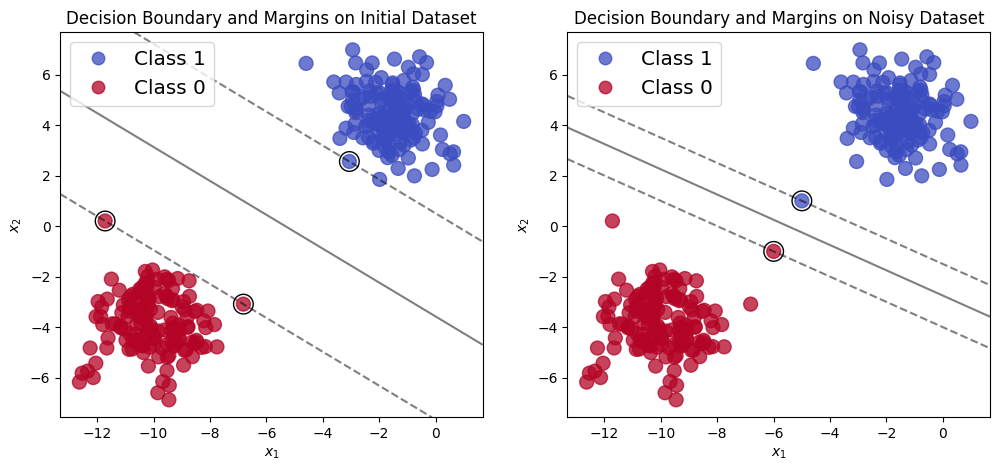

In [15]:
plt.figure(figsize=(12,5))

# plot data and margin on initial dataset
plt.subplot(1,2,1)
scatter1 = plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='coolwarm', alpha=0.75)
plt.legend(handles=scatter1.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plot_svc_decision_function(clf1)
# plot support vectors
plt.scatter(clf1.support_vectors_[:, 0], clf1.support_vectors_[:, 1], s=200, edgecolors='k', facecolors='none');
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Decision Boundary and Margins on Initial Dataset")

# plot data and margin on noisy dataset
plt.subplot(1,2,2)
scatter2 = plt.scatter(X_noisy[:, 0], X_noisy[:, 1], c=y_noisy, cmap='coolwarm', s=100, alpha=0.75)
plt.legend(handles=scatter2.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plot_svc_decision_function(clf2)
# plot support vectors
plt.scatter(clf2.support_vectors_[:, 0], clf2.support_vectors_[:, 1], s=200, edgecolors='k', facecolors='none')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Decision Boundary and Margins on Noisy Dataset")

<div style="direction: rtl; font-size: 1.1em; font-family: arial;">
همان‌طور که می‌بینیم، در نمودار سمت چپ مرز تصمیم‌گیری رسم‌شده، حاشیه آن مقدار قابل توجهی دارد؛ در حالی که در نمودار سمت راست، به دلیل وجود دو نمونه نویز، مرز تصمیم‌گیری و حاشیه‌های آن تغییر کرده و مقدار حاشیه به طور قابل توجهی کاهش یافته است. بنابراین، اعتماد ما به مرز تصمیم‌گیری به دلیل کاهش حاشیه آن کاهش می‌یابد.
</div>
<hr style="margin-top: 25px; border-color: #fff;">


<div style="font-family: arial">
<h2 id="introduction" style="color: #d42c06;"> 1.2.2 Solving the problem</h2>
</div>

<div style="direction: rtl; font-size: 1.1em; font-family: arial;">
راه‌حل این مشکل استفاده از طبقه‌بند حاشیه نرم است. به جای پیدا کردن یک ابرصفحه که تمام داده‌های دو کلاس را به‌طور کامل از یکدیگر جدا کند، می‌توانید از یک ابرصفحه استفاده کنید که بیشتر داده‌های دو کلاس را از یکدیگر جدا می‌کند؛ انگیزه ما برای انجام این کار این است که طبقه‌بند ما حساسیت کمتری به هر نمونه دارد و بنابراین احتمال بیش‌برازش کمتری دارد. در واقع، مدل ما تعدادی کمی از نمونه‌های آموزشی را به اشتباه طبقه‌بندی می‌کند تا تعمیم بهتری روی داده‌های آزمایشی داشته باشد.
</div>


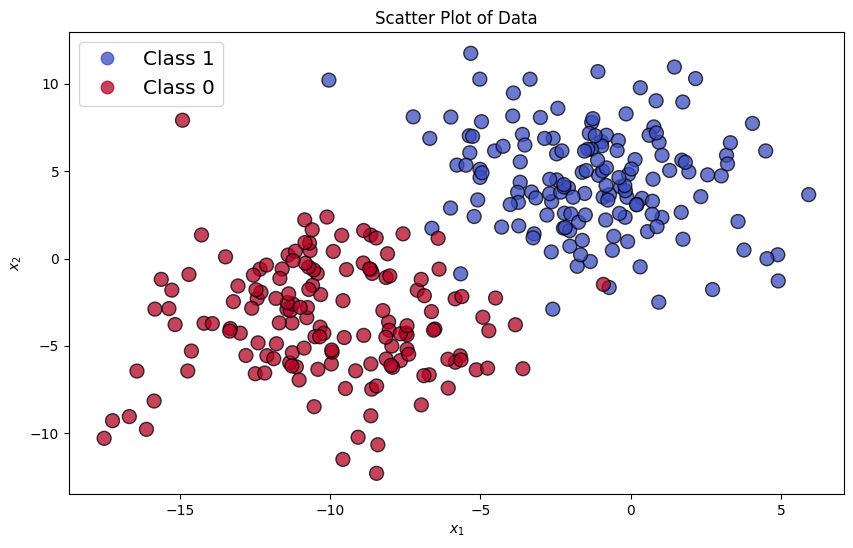

In [16]:
X, y = datasets.make_blobs(n_samples=300, n_features=2, centers=2, cluster_std=3, random_state=1)

plt.figure(figsize=(10,6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='coolwarm', edgecolor='black', alpha=0.75)
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Scatter Plot of Data");
plt.show()

<div style="direction: rtl; font-size: 1.1em; font-family: arial;">
<span>
در زمینه ماشین‌های بردار پشتیبان (SVM)، هایپرپارامتر <code>C</code> نقش مهمی در کنترل تعادل بین حداکثر کردن حاشیه و حداقل کردن خطای طبقه‌بندی (اشتباهات طبقه‌بندی) روی داده‌های آموزشی دارد.
</span><br><br><span>
<strong>تعریف <code>C</code>:</strong><br>
<code>C</code> یک پارامتر تنظیم‌کننده در SVM است که جریمه‌ای برای اشتباهات طبقه‌بندی تعیین می‌کند. این پارامتر کنترل می‌کند که مدل چقدر سعی می‌کند تا کلاس‌ها را جدا کند.<br>
مقدار بزرگتر <code>C</code> باعث اعمال جریمه بالاتر برای اشتباهات طبقه‌بندی می‌شود که منجر به حاشیه باریک‌تر ولی اشتباهات کمتر در طبقه‌بندی می‌شود (که تمرکز بیشتری روی کاهش اشتباهات طبقه‌بندی دارد).<br>
مقدار کوچکتر <code>C</code> اجازه می‌دهد که برخی اشتباهات طبقه‌بندی پذیرفته شوند، که منجر به حاشیه وسیع‌تر و احتمالاً اشتباهات بیشتر در طبقه‌بندی می‌شود (که بیشتر روی حداکثر کردن حاشیه و بهبود تعمیم مدل تمرکز دارد).<br><br>
</span><span>
<strong>شهود پشت <code>C</code>:</strong><br>
وقتی <code>C</code> بزرگ باشد: مدل سعی خواهد کرد که تمامی نمونه‌های آموزشی را به درستی طبقه‌بندی کند، حتی اگر این به معنای داشتن حاشیه‌ای باریک‌تر باشد، که مدل را به داده‌های آموزشی حساس‌تر می‌کند.<br>
وقتی <code>C</code> کوچک باشد: مدل اجازه می‌دهد که برخی از اشتباهات طبقه‌بندی رخ دهد تا حاشیه وسیع‌تری بدست آورد، که بیشتر روی تعمیم به داده‌های جدید تمرکز دارد (که می‌تواند از بیش‌برازش جلوگیری کند).
</span>
برای همین مدلی با مقدار‌های متفاوت این هایپرپارامتر تعریف می‌کنیم و نتایج را می‌بینیم.
</div>


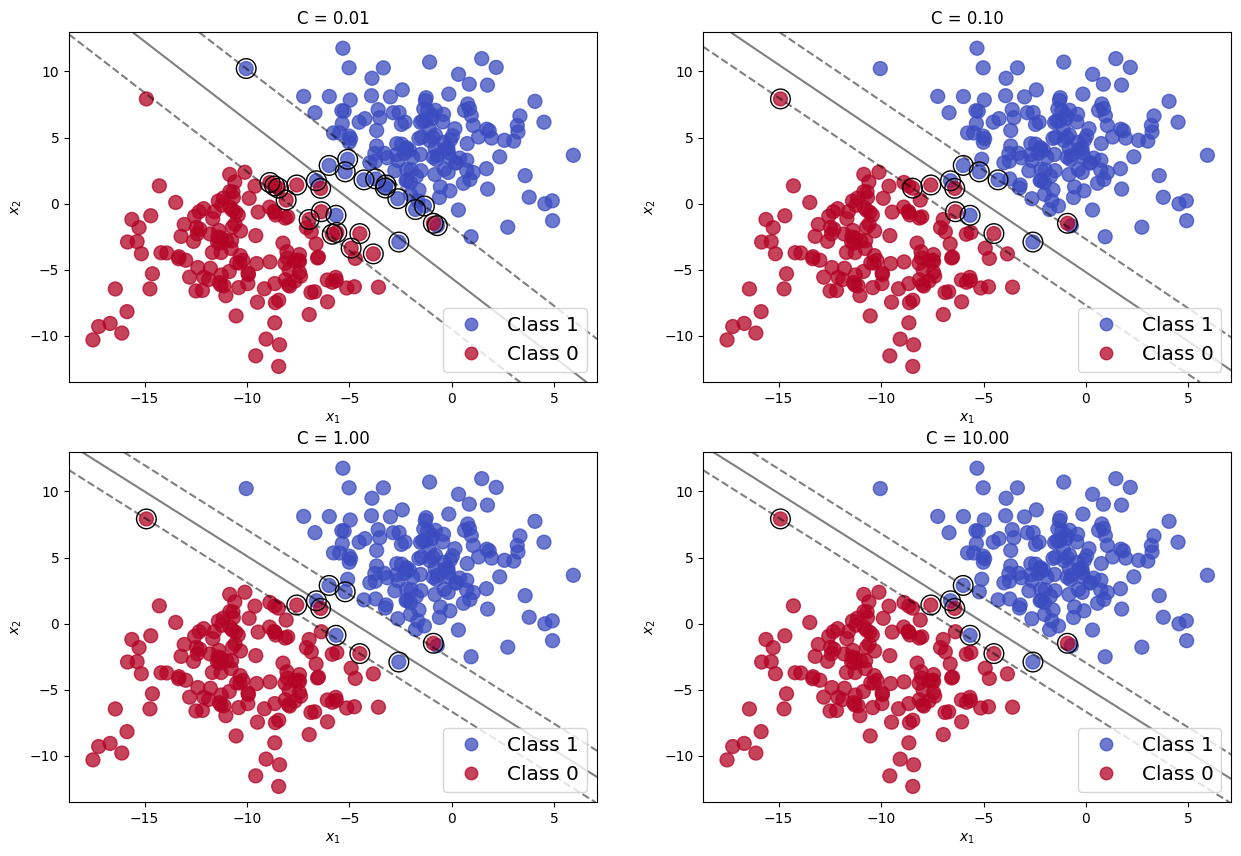

In [17]:
# Define C values
C_vals = [0.01, 0.1, 1, 10]

# Initialize models
models = []
for c in C_vals:
  models.append(SVC(kernel='linear', C=c))

# Train
for clf in models:
  clf.fit(X, y)

# Plot
plt.figure(figsize=(15, 10))
for i in range(len(models)):
    plt.subplot(2,2,i+1)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='coolwarm', alpha=0.75)
    plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)

    # Select classifier model
    clf = models[i]

    # Plot using helper method
    plot_svc_decision_function(clf)

    # plot support vectors
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, edgecolors='k', facecolors='none');

    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.title("C = %.2f" % C_vals[i])
    del clf

<div style="direction: rtl; font-size: 1.1em; font-family: arial;">
همان‌طور که مشاهده می‌کنید، با افزایش مقدار <code>C</code>، حاشیه به‌دست‌آمده کوچک‌تر شده و تعداد نمونه‌های پشتیبانی نیز کاهش یافته است؛ این به این معناست که تعداد کمتری از نمونه‌ها در تعیین این مرز نقش داشته‌اند. بنابراین، می‌توانیم از طبقه‌بند حاشیه نرم برای طبقه‌بندی استفاده کنیم و با تعیین مقدار مناسب برای این هایپرپارامتر، مدلی به‌دست آوریم که مقاوم‌تر از نمونه‌های آموزشی باشد.
</div>


<div style="font-family: arial">
<h2 id="introduction" style="color: #d42c06;"> 1.3 Kernel SVM</h2>
</div>

<div style="font-family: arial">
<h2 id="introduction" style="color: #d42c06;"> 1.3.1 The problem with Soft Margin SVM</h2>
</div>

<div style="direction: rtl; font-size: 1.1em; font-family: 'arial';">
با وجود استفاده از طبقه‌بند حاشیه نرم، مدل ما همچنان به شناسایی مرزهای خطی محدود است؛ در حالی که مدل‌های خطی محدودیت‌های بسیاری دارند و در بسیاری از مسائل واقعی کارایی ندارند. در ادامه، نمونه‌ای از ناتوانی مدل‌های خطی در طبقه‌بندی داده‌های غیرخطی ارائه می‌دهیم.
</div>


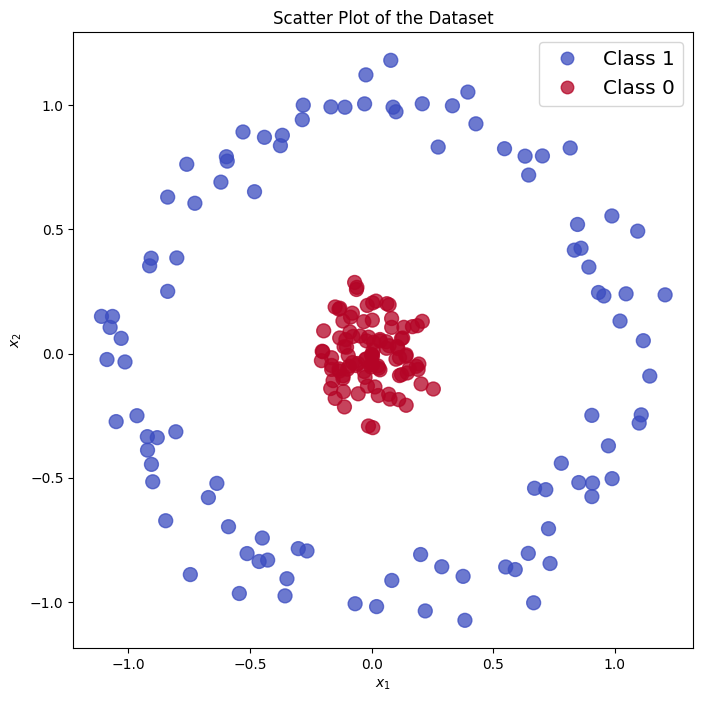

In [18]:
# create dataset
X, y = datasets.make_circles(200, factor=0.1, noise=0.1, random_state=1)

plt.figure(figsize=(8,8))
scatter = plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, cmap='coolwarm', alpha=0.75)
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Scatter Plot of the Dataset")
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Build the classifier
clf = SVC(kernel='linear', C=10)

# Fit the model on the train data
clf.fit(X_train, y_train)

# Predict the model on test data
y_pred_test = clf.predict(X_test)

# Find the accuracy of model on test set by comparing the predicted labels with their true values
accuracy = np.sum(y_test==y_pred_test) / len(y_test)

print("Maximal Margin Classifier Accuracy:", accuracy*100, "%")

Maximal Margin Classifier Accuracy: 52.5 %


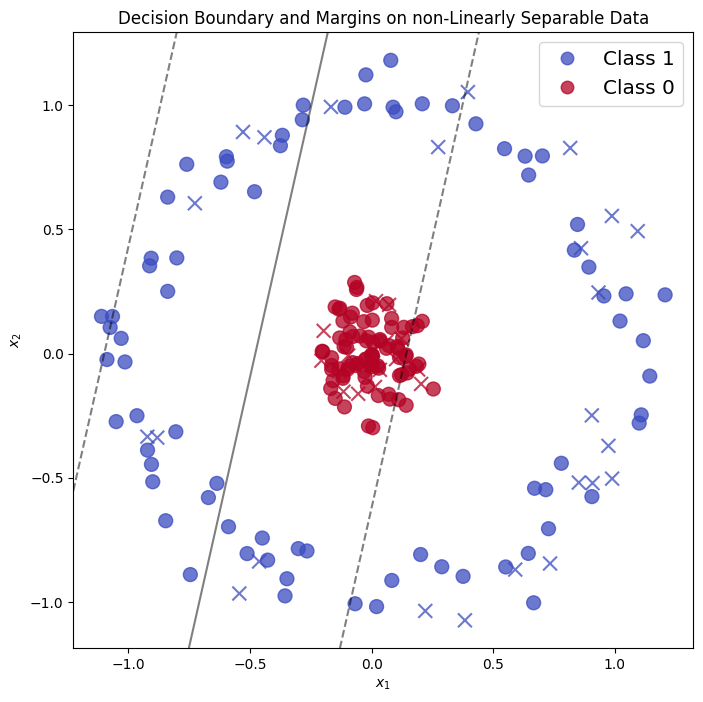

In [20]:
plt.figure(figsize=(8, 8))
train_plt = plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train, cmap='coolwarm', s=100, alpha=0.75)
test_plt = plt.scatter(X_test[:, 0], X_test[:, 1], marker="x", c=y_test, cmap='coolwarm', s=100, alpha=0.75)
plot_svc_decision_function(clf)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Decision Boundary and Margins on non-Linearly Separable Data")
plt.legend(handles=train_plt.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plt.show()

<div style="font-family: arial">
<h2 id="introduction" style="color: #d42c06;"> 1.3.2 Introduction to Kernel</h2>
</div>

<div style="direction: rtl; font-size: 1.1em; font-family: 'arial';">
همان‌طور که گفتیم، گاهی داده‌های دو کلاس ممکن است به صورت خطی قابل تفکیک نباشند و لازم است از یک منحنی به‌عنوان مرز جداکننده استفاده کنیم. در واقع، باید بتوانیم مرزهای غیرخطی را به‌دست آوریم تا الگوریتم ما کاربرد بیشتری داشته باشد. یکی از روش‌های ممکن برای دستیابی به این هدف، گسترش فضای ویژگی به ابعاد بالاتر از طریق تبدیل ویژگی است.  
<br>  
مجموعه داده بخش قبلی را در نظر بگیرید؛ همان‌طور که از توزیع داده‌ها مشخص است، یک مرز دایره‌ای می‌تواند داده‌های دو کلاس را از یکدیگر جدا کند؛ اما الگوریتم ما به شناسایی مرزهای خطی محدود است. حالا برای داده‌ها، ویژگی جدیدی به‌صورت زیر تعریف می‌کنیم:
</div>

$$
X_3 = X_1^2 + X_2^2
$$


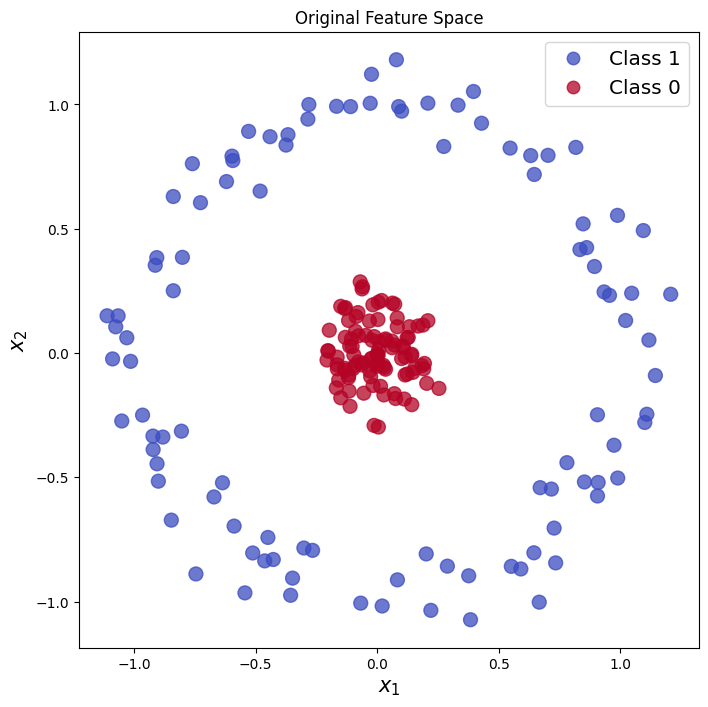

In [21]:
# Create dataset
X, y = datasets.make_circles(200, factor=0.1, noise=0.1, random_state=1)

# Add a new feature as: x_3 = x_1^2+x_2^2
X_1 = X[:,0]
X_2 = X[:, 1]
X_3 = X_1**2 + X_2**2
X3d = np.concatenate((X, X_3.reshape(-1,1)), axis=1)

plt.figure(figsize=(8,8))
scatter2d = plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, cmap='coolwarm', alpha=0.75)
plt.legend(handles=scatter2d.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plt.xlabel("$x_1$", fontsize=15)
plt.ylabel("$x_2$", fontsize=15)
plt.title("Original Feature Space")
plt.show()

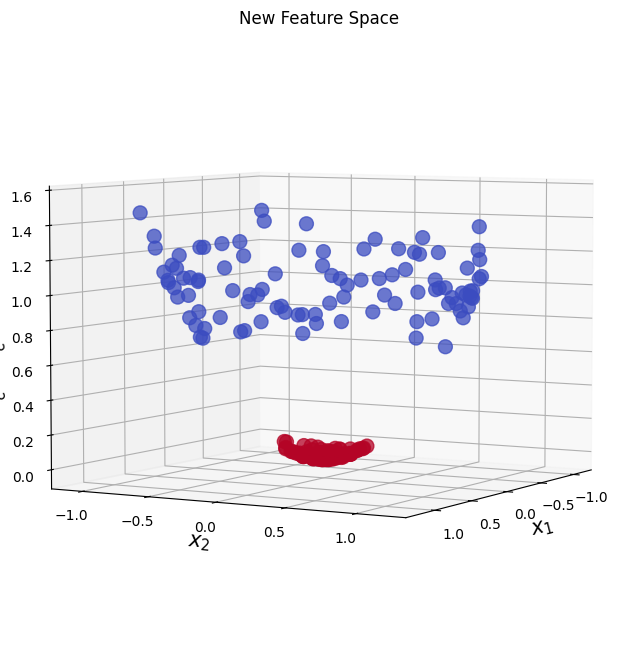

In [22]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X3d[:, 0], X3d[:, 1], X3d[:, 2], marker='o', c=y, s=100, cmap='coolwarm', alpha=0.75)
ax.view_init(elev=5, azim=30)
ax.set_xlabel('$x_1$', fontsize=15)
ax.set_ylabel('$x_2$', fontsize=15)
ax.set_zlabel('$x_3=x_1^2+x_2^2$', fontsize=15)
ax.set_title('New Feature Space')
plt.show()

<div style="font-family: arial">
<h2 id="introduction" style="color: #d42c06;"> 1.3.3 Polynomial Kernel</h2>
</div>

<div style="direction: rtl; font-size: 1.1em; font-family: 'arial';">
همان‌طور که در مثال قبلی مشاهده کردید، اضافه کردن ویژگی مرتبه دوم داده‌های ما را در فضای جدید به صورت خطی قابل تفکیک کرد. یک ایده خوب این است که درجات بالاتر را به فضای ویژگی‌های خود اضافه کنیم، که در نتیجه یک منحنی طبقه‌بندی با مرتبه بالا در فضای اصلی به دست می‌آید. با استفاده از <code>کرنل چندجمله‌ای (polynomial kernel)</code>، می‌توانیم این ویژگی‌ها را به فضای ویژگی اضافه کنیم بدون اینکه خودمان این کار را انجام دهیم؛ بنابراین در این حالت، افزایش تعداد ویژگی‌ها مشکلی ایجاد نخواهد کرد.
<br>
در مرحله بعد، روی مجموعه داده زیر، یک بار از کرنل مرتبه سوم و یک بار از کرنل مرتبه نهم استفاده می‌کنیم تا مدل را آموزش داده و منطقه تصمیم‌گیری آن‌ها را ترسیم کنیم. برای این کار، کافی است هایپرپارامتر <code>kernel</code> را روی <code>poly</code> تنظیم کرده و درجه آن را مشخص کنیم. همچنین، همانند مسئله <code>Soft Margin Classifier</code>، باید پارامتر <code>C</code> را نیز مشخص کنیم. برای ساده‌تر شدن و نمایش بهتر مناطق جداکننده کلاس‌ها، از تابع <code>plot_decision_region</code> از کتابخانه <code>mlxtend</code> استفاده می‌کنیم؛ بنابراین، اگر آن را نصب نکرده‌اید، با استفاده از دستور زیر نصب کنید:
</div>

<pre style="direction: ltr;">
<code>pip install mlxtend</code>
</pre>


In [24]:
# Install the mlxtend library if it's not already installed
!pip install mlxtend

from mlxtend.plotting import plot_decision_regions

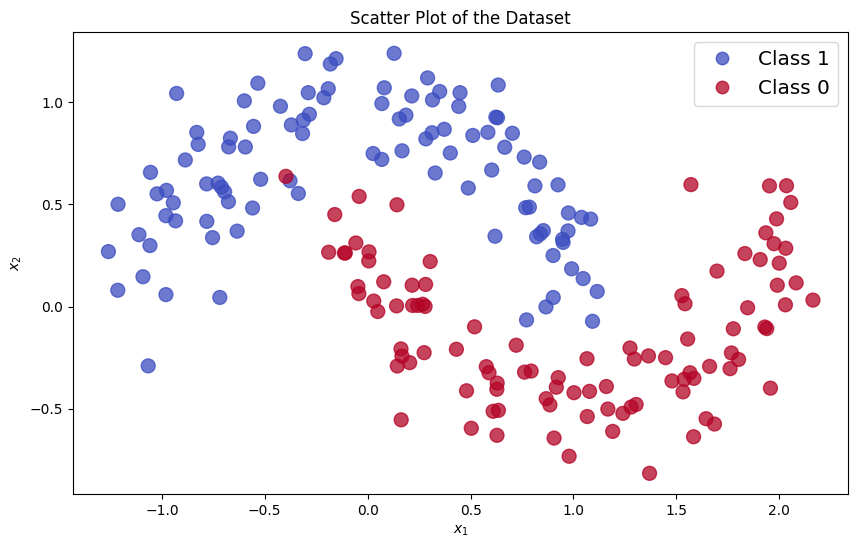

In [30]:
# Create dataset
X, y = datasets.make_moons(n_samples=200,noise=0.15, random_state=0)

plt.figure(figsize=(10,6))
scatter = plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, cmap='coolwarm', alpha=0.75)
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Scatter Plot of the Dataset")
plt.show()

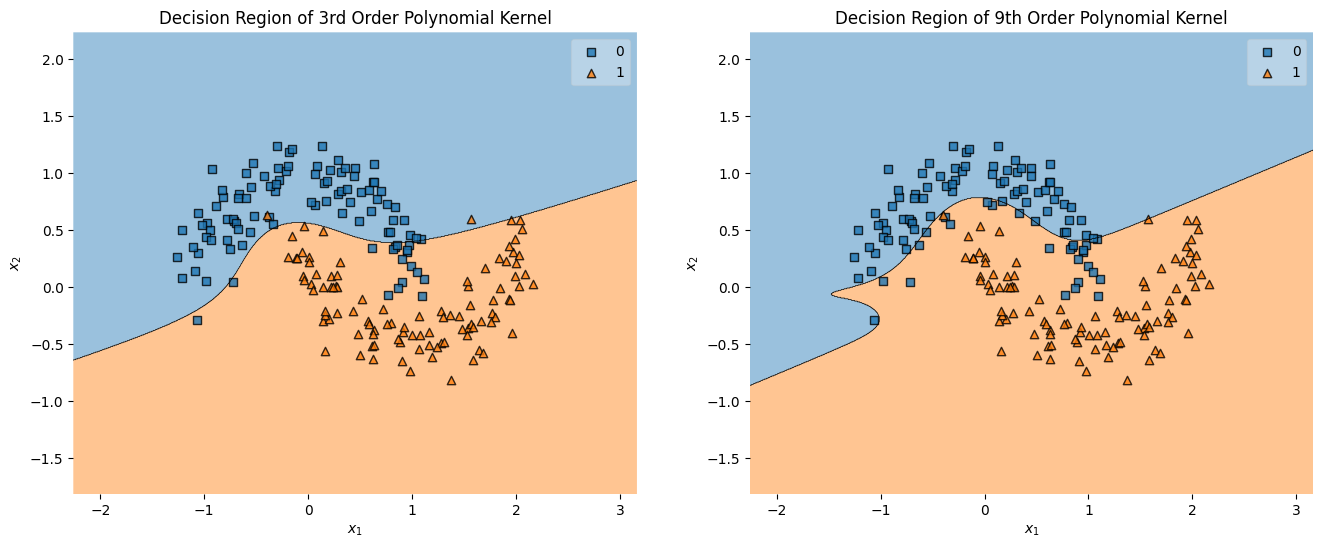

In [31]:
# A 3rd order poly kernel svc
clf_3rd_order = SVC(kernel='poly', degree=3, C=10)

# A 9th order poly kernel svc
clf_9th_order = SVC(kernel='poly', degree=9, C=10)

clf_3rd_order.fit(X, y)
clf_9th_order.fit(X, y)

plt.figure(figsize=(16, 6))

# Plot the 3rd order poly kernel svc
plt.subplot(1,2,1)
plot_decision_regions(X, y, clf=clf_3rd_order, legend=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Decision Region of 3rd Order Polynomial Kernel")

# Plot the 9th order poly kernel svc
plt.subplot(1,2,2)
plot_decision_regions(X, y, clf=clf_9th_order, legend=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Decision Region of 9th Order Polynomial Kernel")

plt.show()

<div style="direction: rtl; font-size: 1.1em; font-family: 'arial';">
همان‌طور که مشاهده می‌کنید، اضافه کردن درجات بالاتر ویژگی‌ها لزوماً منجر به بهبود مرز تصمیم‌گیری نمی‌شود و بهترین درجه باید با استفاده از اعتبارسنجی متقابل (cross validation) پیدا شود. در واقع، اگر مدل ما بیش‌برازش (overfit) شده باشد، باید از درجات پایین‌تر به‌عنوان درجه این کرنل استفاده کنیم، و اگر مدل کم‌برازش (underfit) باشد، باید پیچیدگی آن را با افزایش این درجه افزایش دهیم.
</div>


<div style="font-family: arial">
<h2 id="introduction" style="color: #d42c06;"> 1.3.4 Radial Basis Function (RBF)</h2>
</div>

<div style="direction: rtl; font-size: 1.1em; font-family: 'arial';">
<span>
کرنل دیگری که به طور رایج استفاده می‌شود، RBF (تابع پایه شعاعی گاوسی) است. در ادامه، ابتدا برای درک بهتر، این کرنل را بر روی یک مجموعه داده رسم می‌کنیم، سپس دو ماشین بردار پشتیبان (SVM) را بر روی دو مجموعه داده مختلف با استفاده از این کرنل آموزش داده و نتایج را مشاهده می‌کنیم.
</span><br>
    هایپرپارامتر <code>gamma</code> مقدار واریانس این تابع را تعیین می‌کند. هرچه این پارامتر کمتر باشد، واریانس بیشتر می‌شود و وزن بیشتری به نمونه‌های دورتر داده می‌شود و برعکس.
</div>


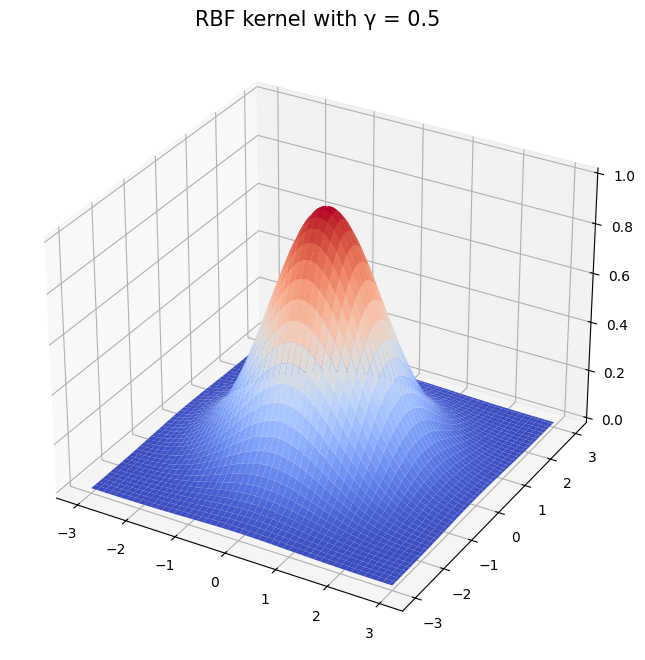

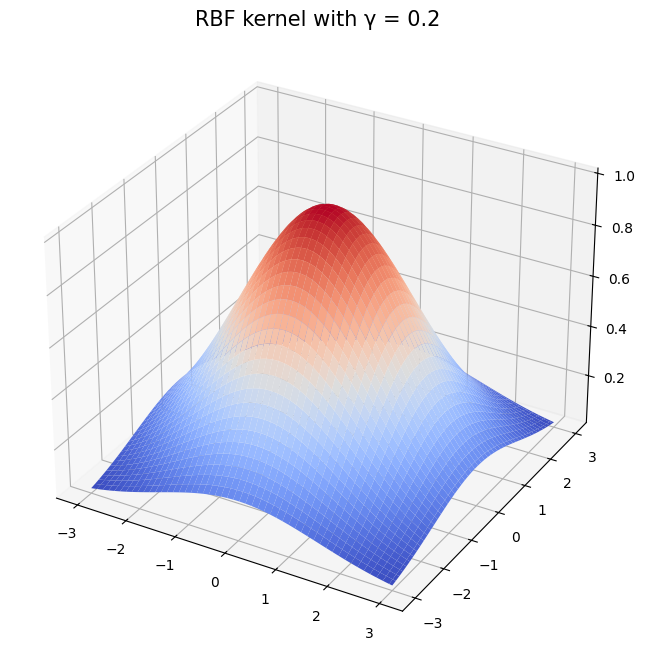

In [37]:
#creating Dataset
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)

def plot_RBF_kernel(gamma):
  R = np.exp(-gamma*(X1 ** 2 + X2 ** 2))

  fig = plt.figure(figsize=(10,8))
  ax = fig.add_subplot(111, projection='3d')
  surf = ax.plot_surface(X1, X2, R, cmap=plt.cm.coolwarm)
  plt.title('RBF kernel with γ = {:.1f}'.format(gamma), fontsize=15)
  plt.show()

#plot
plot_RBF_kernel(gamma = 0.5)
plot_RBF_kernel(gamma = 0.2)

<div style="direction: rtl; font-size: 1.1em; font-family: 'arial';">
    ما از دو مجموعه داده زیر استفاده می‌کنیم:
    <ul>
        <li><strong>مجموعه داده <code>make_moons</code>:</strong> مجموعه‌ای از نمونه‌ها که به‌صورت دوتایی در دو نیم‌دایره پراکنده‌اند.</li>
        <li><strong>مجموعه داده <code>make_circles</code>:</strong> مجموعه‌ای از نمونه‌های دایره‌ای که به دو دسته تقسیم می‌شوند.</li>
    </ul>
</div>


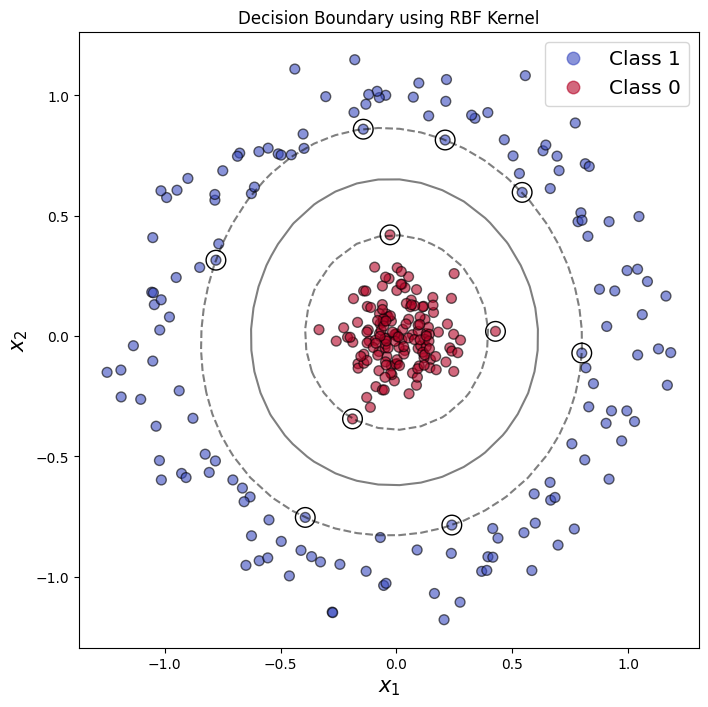

In [38]:
X, y = datasets.make_circles(n_samples=300, factor=0.1, noise=0.1, random_state=1)

clf = SVC(kernel='rbf', gamma=0.7, C=10)
clf.fit(X, y)

plt.figure(figsize=(8,8))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, edgecolors='k', facecolors='none')
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plt.xlabel("$x_1$", fontsize=15)
plt.ylabel("$x_2$", fontsize=15)
plt.title("Decision Boundary using RBF Kernel")
plt.show()

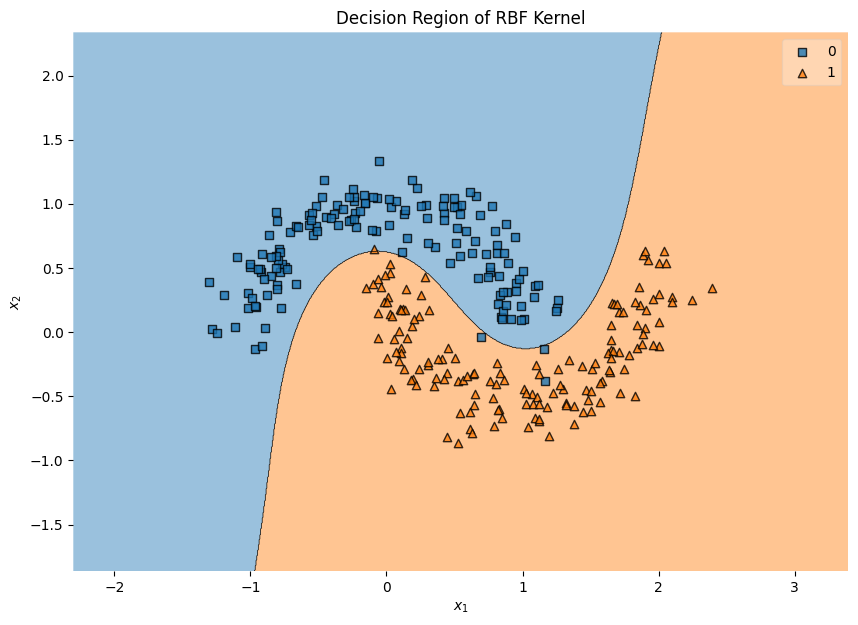

In [40]:
X, y = datasets.make_moons(n_samples=300,noise=0.15, random_state=0)

clf = SVC(kernel='rbf', gamma=0.7, C=5)
clf.fit(X, y)

plt.figure(figsize=(10,7))
plot_decision_regions(X, y, clf=clf, legend=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Decision Region of RBF Kernel")
plt.show()

<div style="direction: rtl; font-size: 1.1em; font-family: 'arial';">
    همان‌طور که مشاهده می‌کنید، با استفاده از کرنل <code>RBF</code>، مرز دو کلاس داده به‌خوبی تعیین شده است و این کرنل معمولاً عملکرد بهتری دارد. همچنین، به‌طور پیش‌فرض، مدل <code>SVC</code> کرنل خود را بر روی این کرنل تنظیم می‌کند.
<div>


<div style="font-family: arial; direction: rtl;">
<h2 id="introduction" style="color: #d42c06;">تمرین اول</h2>
<div>


<div style="direction: rtl; font-size: 1.1em; font-family: arial;">
در این تمرین، یک مجموعه داده مصنوعی ایجاد می‌کنیم و انواع مختلف ماشین‌های بردار پشتیبان را با استفاده از کتابخانه Scikit-Learn امتحان خواهیم کرد. با ایجاد داده‌ها و نوشتن یک تابع که می‌تواند نمودار پراکندگی داده‌ها و همچنین سطح تصمیم‌گیری و مرز دسته‌بند را نمایش دهد، شروع می‌کنیم. از این تابع بعداً استفاده خواهد شد (می‌توانید فعلاً آن را نادیده بگیرید!).
ما داده‌هایی برای دو کلاس ایجاد می‌کنیم: کلاس مثبت شامل اعداد تصادفی توزیع شده گاوسی با مرکز در نقطه (1,1) و انحراف معیار برابر با 1.0 است، در حالی که کلاس منفی نیز شامل اعداد تصادفی توزیع شده گاوسی است اما با مرکز در نقطه (-1,-1) و انحراف معیار برابر با 1.0.
</div>

The data dimensions are (200, 2) (200,)


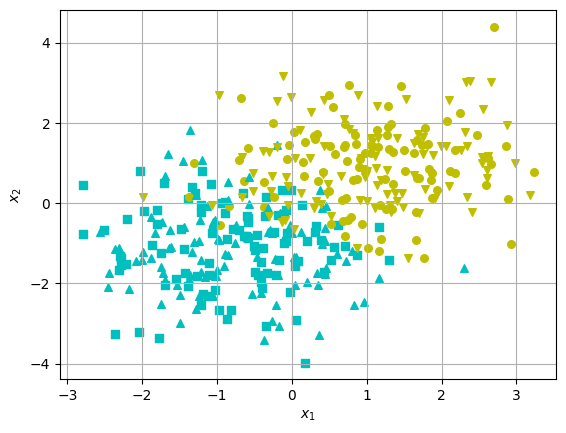

[np.float64(-2.562771989518124),
 np.float64(3.1862227394909897),
 np.float64(-3.4017437264996753),
 np.float64(3.1738101077217813)]

In [51]:
from numpy.random import randn 
import numpy as np 
import matplotlib.pyplot as plt 
import itertools
import warnings

def plotit(X,Y=None,clf=None,  conts = None, ccolors = ('b','k','r'), colors = ('c','y'), markers = ('s','o'), hold = False, transform = None,extent = None,**kwargs):
    """
    A function for showing data scatter plot and classification boundary
    of a classifier for 2D data
        X: nxd  matrix of data points
        Y: (optional) n vector of class labels
        clf: (optional) classification/discriminant function handle
        conts: (optional) contours (if None, contours are drawn for each class boundary)
        ccolors: (optional) colors for contours
        colors: (optional) colors for each class (sorted wrt class id)
            can be 'scaled' or 'random' or a list/tuple of color ids
        markers: (optional) markers for each class (sorted wrt class id)
        hold: Whether to hold the plot or not for overlay (default: False).
        transform: (optional) a function handle for transforming data before passing to clf
        kwargs: any keyword arguments to be passed to clf (if any)
    """
    
    if clf is not None and X.shape[1]!=2:
        warnings.warn("Data Dimensionality is not 2. Unable to plot.")
        return
        
    if markers is None:
        markers = ('.',)
        
    eps=1e-6
    d0,d1 = (0,1)
    
    if extent is None:
        minx, maxx = np.min(X[:,d0])-eps, np.max(X[:,d0])+eps
        miny, maxy = np.min(X[:,d1])-eps, np.max(X[:,d1])+eps
        extent = [minx,maxx,miny,maxy]
    else:
        [minx,maxx,miny,maxy] = extent
        
    if Y is not None:
        classes = sorted(set(Y))
        if conts is None:
            conts = list(classes)
        vmin,vmax = classes[0]-eps,classes[-1]+eps
    else:
        vmin,vmax=-2-eps,2+eps
        if conts is None:
            conts = sorted([-1+eps,0,1-eps])

    if clf is not None:
        npts = 150
        x = np.linspace(minx,maxx,npts)
        y = np.linspace(miny,maxy,npts)
        t = np.array(list(itertools.product(x,y)))
        if transform is not None:
            t = transform(t)
        z = clf(t,**kwargs)

        z = np.reshape(z,(npts,npts)).T

        plt.contour(x,y,z,conts,linewidths = [2],colors=ccolors,extent=extent)
        
        #plt.imshow(np.flipud(z), extent = extent, cmap=plt.cm.Purples, vmin = -2, vmax = +2); plt.colorbar()
        plt.pcolormesh(x, y, z,cmap=plt.cm.Purples,vmin=vmin,vmax=vmax);plt.colorbar()
        plt.axis(extent)

    if Y is not None:
        for i,y in enumerate(classes):
            if colors is None or colors=='scaled':
                cc = np.array([[i,i,i]])/float(len(classes))
            elif colors =='random':
                cc = np.array([[np.random.rand(),np.random.rand(),np.random.rand()]])
            else:
                cc = colors[i%len(colors)]
            mm = markers[i%len(markers)]
            plt.scatter(X[Y==y,d0],X[Y==y,d1], marker = mm,c = cc, s = 30)

    else:
        plt.scatter(X[:,d0],X[:,d1],marker = markers[0], c = 'k', s = 5)
        
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    
    if not hold:
        plt.grid()
        plt.show()
        
    return extent

# Let's generate some training data
Xp = 1+np.random.randn(100,2)
Xn = -1-np.random.randn(100,2)
X = np.vstack((Xp,Xn))
Y = np.array([1]*Xp.shape[0]+[-1]*Xn.shape[0])
print ('The data dimensions are',X.shape, Y.shape)

plotit(X,Y, hold = True)

# Let's generate some test data
Xpt = 1+np.random.randn(100,2)
Xnt = -1-np.random.randn(100,2)
Xt = np.vstack((Xpt,Xnt))
Yt = np.array([1]*Xpt.shape[0]+[-1]*Xnt.shape[0])

plotit(Xt, Yt, markers = ('^','v'))

<div style="direction: rtl; font-size: 1.1em; font-family: arial;">
نمودار بالا نمودار پراکندگی داده‌های آموزشی و آزمایشی ما را نشان می‌دهد. دو کلاس با تفاوت رنگ و نشانگرها مشخص شده‌اند. داده‌های آموزشی با دایره‌ها و مربع‌ها نشان داده شده‌اند در حالی که کلاس‌های داده‌های آزمایشی با مثلث‌های رو به بالا یا پایین نمایش داده شده‌اند.
<hr style="margin-top: 25px; border-color: #fff;">
<div>


<div style="direction: rtl; font-size: 1.1em; font-family: arial;">
بیایید یک طبقه‌بند خطی ساده بسازیم. این کار می‌تواند با استفاده از ماژول <code>sklearn.svm</code> انجام شود 
<a href="http://scikit-learn.org/stable/modules/svm.html" target="_blank">(لینک به مستندات)</a>. 
ابتدا یک شی از کلاس <code>LinearSVC</code> ایجاد می‌کنیم و سپس آن را با استفاده از تابع <code>.fit</code> به داده‌ها متصل می‌کنیم. می‌توانیم برچسب‌های کلاس را با استفاده از <code>clf.predict</code> پیش‌بینی کنیم و امتیازهای تابع تصمیم‌گیری را با استفاده از <code>clf.decision_function</code> به‌دست آوریم. 
دقت داده‌های آموزشی و آزمایشی را ارزیابی می‌کنیم. سپس بردار وزن و بایاس طبقه‌بندی‌کننده آموزش‌داده‌شده را به‌دست می‌آوریم و معیار آن را محاسبه می‌کنیم.
</div>


In [72]:
from sklearn.svm import LinearSVC

# Create a linear SVM classifier with balanced class weights

# TODO: Initialize LinearSVC with appropriate parameter C
clf = LinearSVC()

# TODO: Train the classifier using the training data (X, Y)

# TODO: Use the classifier to predict the labels for Xt

# TODO: Compute the decision function for Xt


In [56]:
# TODO: Compute the training accuracy and the test accuracy


Train Accuracy: 0.935
Test Accuracy: 0.91


In [49]:
# TODO: Obtain the weight vector (w) and bias (b) from the trained classifier

# TODO: Compute the norm of w


w =  [[0.50115177 0.68667956]]
b =  [0.00349387]
||w|| =  0.850107005218426


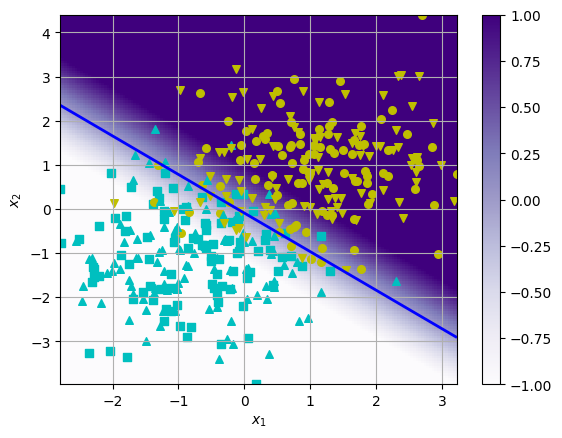

[np.float64(-2.562771989518124),
 np.float64(3.1862227394909897),
 np.float64(-3.4017437264996753),
 np.float64(3.1738101077217813)]

In [54]:
# Visualizing the Decision Boundary
plotit(X,Y, clf.decision_function, conts = [0], hold = True)
plotit(Xt,Yt, markers = ('^','v'))

<div style="direction: rtl; font-size: 1.1em; font-family: arial;">

<div style="font-family: arial; direction: rtl;">
    
<h2 id="" style="color: #d42c06;">پرسش‌ها</h2>

<span>
۱. بردارهای پشتیبانی را پیدا کنید.
</span><br><span>
۲. نمونه‌های آموزشی که به اشتباه طبقه‌بندی شده‌اند را پیدا کنید. آیا تمام این نمونه‌ها بردارهای پشتیبانی هستند؟
</span><br><span>
۳. تاثیر مقدار <code>C</code> بر مرز طبقه‌بندی، حاشیه و معیار بردار وزن چیست؟ شما می‌توانید این را با تغییر مقدار <code>C</code> و اجرای مجدد کد درک کنید.
</span><br><span>
۴. چگونه مقدار <code>C</code> را انتخاب کنیم؟
</span>

</div>


<div style="direction: rtl; font-size: 1.1em; font-family: arial;">
<h2 id="linear-svm-using-svc" style="color: #d42c06;">تمرین دوم</h2>
بیایید دسته‌بندی خطی را با استفاده از SVC امتحان کنیم. این روش دیگری (انعطاف‌پذیرتر) برای ساخت SVM است و مسئله SVM را به حالت دوگان به جای حالت اولیه (آنچه LinearSVC انجام می‌دهد) حل می‌کند. همچنین به طور مستقیم به ما نشان می‌دهد که کدام نقاط بردار پشتیبانی هستند و آن‌ها را به صورت نقاط سیاه روی داده‌های اصلی رسم می‌کنیم. همچنین می‌توانیم ببینیم که چه تعداد بردار پشتیبانی به‌دست می‌آوریم.
</div>


In [58]:
from sklearn.svm import SVC

# TODO: Create an SVC with linear kernel and C=1.0 for regularization.
clf = SVC()

# TODO: Train the classifier using the training data (X, Y)

# TODO: Use the classifier to predict the labels for Xt

# TODO: Compute the decision function for Xt

# TODO: Compute the training accuracy and the test accuracy


Train Accuracy: 0.92
Test Accuracy: 0.91


In [59]:
# TODO: Extract the weight vector (w) and bias (b) of the trained classifier.

# TODO: Extract the support vectors used by the model.

# Print the weight vector, bias, and number of support vectors
print("Weight vector (w):", w)
print("Bias (b):", b)
print("Number of support vectors:", sv.shape[0])

Weight vector (w): [[1.40009146 1.3801863 ]]
Bias (b): [-0.04313709]
Number of support vectors: 41


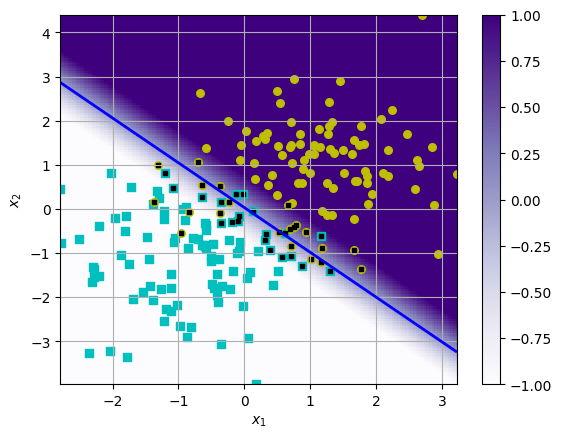

[np.float64(-2.562771989518124),
 np.float64(3.1862227394909897),
 np.float64(-3.4017437264996753),
 np.float64(3.1738101077217813)]

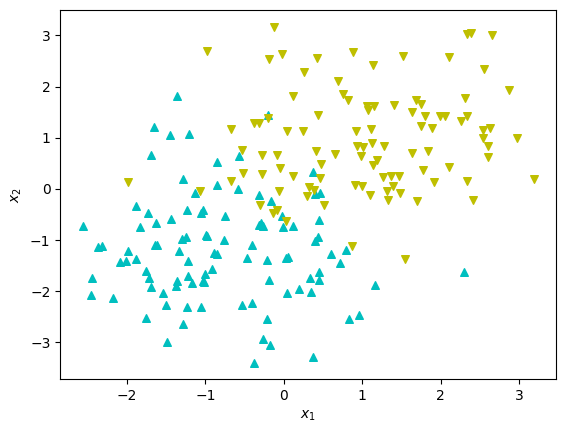

In [65]:
plotit(X, Y, clf.decision_function, conts=[0], hold=True)
plotit(sv)
plotit(Xt, Yt, markers=('^', 'v'), hold=True)  # Plot test data points for better understanding

<div style="font-family: arial; direction: rtl;">
<h2 id="" style="color: #d42c06;">تمرین سوم</h2>
</div>

<div style="direction: rtl; font-size: 1.1em; font-family: arial;">
    بیایید کرنل چندجمله‌ای را امتحان کنیم.
</div>


In [66]:
from sklearn.svm import SVC

# TODO: Create an SVM classifier with a polynomial kernel, C=1.0, degree=2, and coef0=1.0
clf = SVC()

# TODO: Train the classifier using the training data (X, Y)

# TODO: Use the classifier to predict the labels for Xt

# TODO: Compute the decision function for Xt

# TODO: Extract the support vectors used by the model.

print("Test Accuracy", np.mean(Yp==Yt))
print("Train Accuracy", np.mean(clf.predict(X)==Y))
print('Number of support vectors:', sv.shape[0])

Test Accuracy 0.91
Train Accuracy 0.92
Number of support vectors: 44


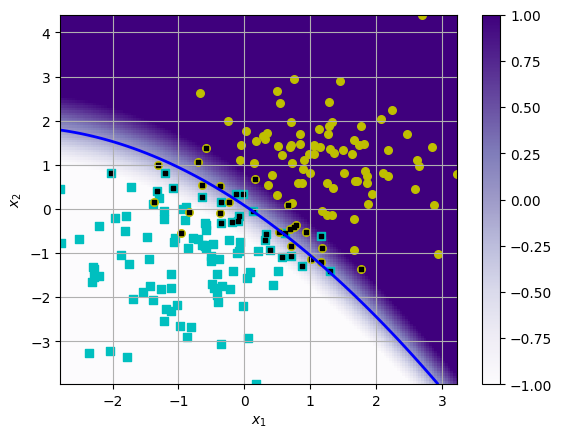

[np.float64(-2.0246464206533723),
 np.float64(1.764260825723648),
 np.float64(-1.406509539189781),
 np.float64(1.377262212262168)]

In [67]:
plotit(X,Y, clf.decision_function, conts = [0], hold = True)
plotit(sv)

<div style="direction: rtl; font-size: 1.1em; font-family: arial;">

<div style="font-family: arial; direction: rtl;">
    
<h2 id="introduction" style="color: #d42c06;">پرسش‌ها </h2>

</div>

<span>
۱. تاثیر درجه <code>degree</code> بر دقت تست و آموزش چیست؟ چرا؟
</span><br><span>
۲. تاثیر پارامترهای <code>C</code> و درجه بر تعداد بردارهای پشتیبانی چیست؟
</span><br><span>
۳. آیا می‌توانید برای درجه ۳، <code>C</code> را تغییر دهید به‌طوری‌که مرز تصمیم‌گیری خطی شود؟
</span><br><span>
۴. چگونه باید درجه را انتخاب کنیم؟
</span>

</div>


<div style="font-family: arial; direction: rtl;">
<h2 id="introduction" style="color: #d42c06;">تمرین چهارم</h2>
<div>


<div style="direction: rtl; font-size: 1.1em; font-family: arial;">
    بیایید کرنل rbf را امتحان کنیم.
</div>


In [70]:
from sklearn.svm import SVC

# TODO: Create an SVM classifier with an RBF kernel, C=1.0, gamma=1.0, and cache_size=2000
clf = SVC()

# TODO: Train the classifier using the training data (X, Y)

# TODO: Use the classifier to predict the labels for Xt

# TODO: Compute the decision function for Xt

# TODO: Extract the support vectors used by the model.

print("Test Accuracy", np.mean(Yp==Yt))
print("Train Accuracy", np.mean(clf.predict(X)==Y))
print('Number of support vectors:', sv.shape[0])

Test Accuracy 0.9
Train Accuracy 0.935
Number of support vectors: 66


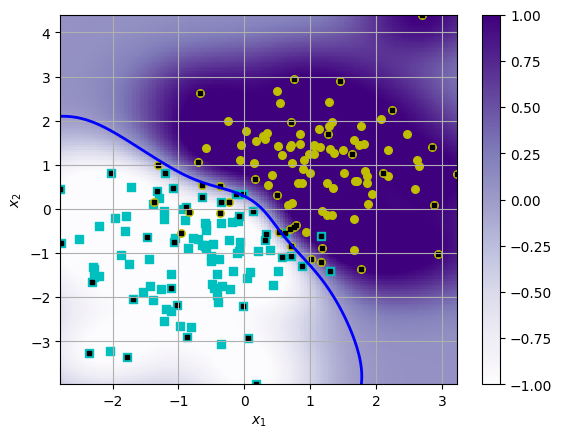

[np.float64(-2.7960043580722163),
 np.float64(3.2281266175565935),
 np.float64(-3.974588815503406),
 np.float64(4.401372577851364)]

In [71]:
plotit(X,Y, clf.decision_function, conts = [0], hold = True)
plotit(sv)

<div style="direction: rtl; font-size: 1.1em; font-family: arial;">
    <h2 id="questions" style="color: #d42c06;">پرسش‌ها</h2>
    ۱. نقش پارامتر <code>gamma</code> چیست؟ چگونه مرز تصمیم‌گیری، دقت تست و آموزش را تغییر می‌دهد؟<br>
    ۲. تعداد بردارهای پشتیبانی با تغییر <code>gamma</code> و <code>C</code> چگونه تغییر می‌کند؟<br>
    ۳. چه مقداری از <code>gamma</code> منجر به مرز خطی می‌شود؟<br>
    ۴. چه اتفاقی برای حاشیه و مرز تصمیم‌گیری می‌افتد زمانی که به طور همزمان <code>gamma</code> را افزایش داده و <code>C</code> را کاهش می‌دهید؟
</div>
